In [1]:
import requests
import base64
import pandas as pd
import numpy as np
import json

In [2]:
with open('config/config.json', 'r') as f:
    config = json.load(f)

In [3]:
CLIENT_ID = config['CLIENT_ID']
CLIENT_SECRET = config['CLIENT_SECRET']

# POST

In [4]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

CLIENT_CREDENTIALS = f'{CLIENT_ID}:{CLIENT_SECRET}'
CLIENT_CREDENTIALS_B64 = base64.b64encode(CLIENT_CREDENTIALS.encode())

TOKEN_DATA = {
    "grant_type": "client_credentials"
}

TOKEN_HEADERS = {
    "Authorization": f"Basic {CLIENT_CREDENTIALS_B64.decode()}"
}

In [5]:
REQUEST = requests.post(AUTH_URL, data = TOKEN_DATA, headers = TOKEN_HEADERS)
response_data = REQUEST.json()
access_token = response_data['access_token']
expires_in = response_data['expires_in']

In [6]:
access_token

'BQCRpqfscQMi1Fjvv89kElPy0Bj8kv1SEAks9RBopFwO5dsc_Z-hy70v3mNClvDSt79NbvytBCyRUH5cBm5cRrDWPtjLp9Ak9hFKcXVKsZmQPLMg0bY'

In [7]:
expires_in

3600

# Spotipy

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [9]:
# Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [10]:
# We get all tracks in a playlist
playlist_link = "https://open.spotify.com/playlist/0JNQmyPN5iA9e2iYNwE1wy?si=61bc088cae494503"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [11]:
# We can loop over all tracks and get information about them
keys = ["artist_name", "artist_pop", "track_name", "track_pop", "album", "key", "mode", "tempo", "duration_ms", "time_signature", "energy", "danceability", "instrumentalness"]
artist_keys = ["artist_name", "artist_pop", "track_name", "track_pop", "album"]
audio_keys = ["key", "mode", "tempo", "duration_ms", "time_signature", "energy", "danceability", "instrumentalness"]
dict_data = {key: np.array([]) for key in keys}
for track in sp.playlist_tracks(playlist_URI)["items"][0:11]:  
    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    
    # We get audio features
    audio_features = sp.audio_features(track_uri)[0]
    
    # We look for the preview url
    preview_url = track["track"]['preview_url']

    # We get the cover url
    cover_url = track["track"]['album']['images'][0]['url']
    
    # We save the results
    dict_data["artist_name"] = np.append(dict_data["artist_name"], artist_name)
    dict_data["artist_pop"] = np.append(dict_data["artist_pop"], artist_pop)
    dict_data["track_name"] = np.append(dict_data["track_name"], track_name)
    dict_data["track_pop"] = np.append(dict_data["track_pop"], track_pop)
    dict_data["album"] = np.append(dict_data["album"], album)
    
    for audio_key in audio_keys:
        dict_data[audio_key] = np.append(dict_data[audio_key], audio_features[audio_key])
    
    # Prints
    print(artist_name, "-", track_name)

AVAION - Pieces
SIDEPIECE - Together
Kaskade - Turn It Down v3
JLV - Chemical Days
Swedish House Mafia - Redlight
John Summit - Deep End - SIDEPIECE Remix
ARTBAT - Horizon
Michael Calfan - No Lie
Jess Ball - Messed Up
SOMMA - Body on Fire
Nazzereene - Where I Belong


In [12]:
audio_features

{'danceability': 0.924,
 'energy': 0.669,
 'key': 0,
 'loudness': -4.126,
 'mode': 1,
 'speechiness': 0.0374,
 'acousticness': 0.084,
 'instrumentalness': 0.00519,
 'liveness': 0.0964,
 'valence': 0.891,
 'tempo': 109.997,
 'type': 'audio_features',
 'id': '2K3T7YE6hHjIgUVGlewqjx',
 'uri': 'spotify:track:2K3T7YE6hHjIgUVGlewqjx',
 'track_href': 'https://api.spotify.com/v1/tracks/2K3T7YE6hHjIgUVGlewqjx',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2K3T7YE6hHjIgUVGlewqjx',
 'duration_ms': 160364,
 'time_signature': 4}

In [14]:
df = pd.DataFrame(dict_data)
df.set_index("artist_name", inplace = True)

In [15]:
df

,artist_pop,track_name,track_pop,album,key,mode,tempo,duration_ms,time_signature,energy,danceability,instrumentalness
artist_name,,,,,,,,,,,,
AVAION,63.0,Pieces,73.0,Pieces,4.0,1.0,120.015,196413.0,4.0,0.271,0.700,0.322000
SIDEPIECE,62.0,Together,62.0,Together,2.0,0.0,125.056,186341.0,4.0,0.749,0.727,0.006660
Kaskade,66.0,Turn It Down v3,38.0,Turn It Down v3,5.0,0.0,125.006,292354.0,4.0,0.862,0.738,0.028000
JLV,51.0,Chemical Days,58.0,Chemical Days,5.0,0.0,124.019,175183.0,4.0,0.834,0.745,0.483000
Swedish House Mafia,76.0,Redlight,16.0,Redlight,2.0,1.0,125.012,242905.0,4.0,0.655,0.716,0.162000
John Summit,66.0,Deep End - SIDEPIECE Remix,65.0,Deep End (SIDEPIECE Remix),11.0,0.0,126.007,196687.0,4.0,0.652,0.773,0.024000
ARTBAT,59.0,Horizon,63.0,Horizon,5.0,0.0,124.023,464516.0,4.0,0.660,0.647,0.914000
Michael Calfan,59.0,No Lie,47.0,No Lie,1.0,0.0,122.034,166992.0,4.0,0.701,0.719,0.121000
Jess Ball,47.0,Messed Up,33.0,Messed Up,2.0,0.0,140.993,131489.0,4.0,0.515,0.816,0.000001


In [134]:
#df.to_csv("hypno_deep.csv", sep = ";")

# Get images

In [16]:
sample = df.sample(1)

In [17]:
sample

,artist_pop,track_name,track_pop,album,key,mode,tempo,duration_ms,time_signature,energy,danceability,instrumentalness
artist_name,,,,,,,,,,,,
SOMMA,61.0,Body on Fire,64.0,Body on Fire,9.0,0.0,125.024,159180.0,4.0,0.691,0.735,0.0186


In [18]:
artist = sample.index[0]
track = sample['track_name']

In [19]:
result = sp.search(q="artist:" + artist + " track:" + track, type="track")

In [21]:
image_url = result['tracks']['items'][0]['album']['images'][1]['url']

In [22]:
from PIL import Image
from io import BytesIO

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

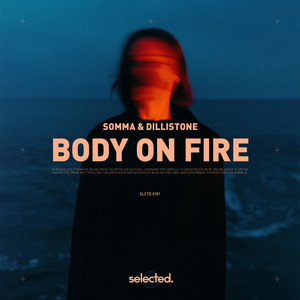

In [23]:
img

# Get preview

In [24]:
import simpleaudio

ModuleNotFoundError: No module named 'simpleaudio'

In [25]:
preview_url = result['tracks']['items'][0]['preview_url']
preview_url

'https://p.scdn.co/mp3-preview/4214e7f92a516481d7f04061173cdf0e8a3563d7?cid=a7c0ec514e3d4382acfa62c3417957ee'

In [26]:
import vlc

In [27]:
instance = vlc.Instance('--input-repeat=-1', '--fullscreen')

In [28]:
#Define VLC player
player=instance.media_player_new()

#Define VLC media
media=instance.media_new(preview_url)

#Set player media
player.set_media(media)

#Play the media
player.play()

0

In [29]:
player.stop()